In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-21 17:16:41 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-21 17:16:42 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-21 17:16:42 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-21 17:16:44,541] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-21 17:16:44 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpwdi3f5o8/test.c -o /tmp/tmpwdi3f5o8/test.o
2025-07-21 17:16:44 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpwdi3f5o8/test.o -laio -o /tmp/tmpwdi3f5o8/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-21 17:16:45 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpq041e7qx/test.c -o /tmp/tmpq041e7qx/test.o
2025-07-21 17:16:45 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpq041e7qx/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpq041e7qx/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-21 17:16:46 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-21 17:16:46 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-21 17:16:46 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-21 17:16:46 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-21 17:16:47 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-21 17:16:47 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-21 17:16:47 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-21 17:16:47 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-21 17:17:36 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-21 17:17:36 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-21 17:17:53 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
202

In [8]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)
list(people_by_category.keys())

2025-07-21 17:18:00 src.selection.data INFO     Loaded 16 categories


['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

## Patching

### Testing

In [27]:
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 9,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

In [28]:
from src.functional import generate_with_patch
from src.selection.data import get_random_sample
import random

######################################################################
n_distractors = 5
######################################################################

patch_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    obj_idx = 3,
    get_alt_obj=True,
)



patch_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    exclude_distractor_categories=[patch_sample_1.metadata["category"]]
)

patch_prompt = (
    patch_sample_1.prompt + f" {patch_sample_1.obj}" + "\n\n" + patch_sample_2.prompt
)

print(patch_prompt, " >> ", patch_sample_2.obj)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{patch_gen}"')

Which person from the following list has the profession in common with Johnny Depp?
Options: Tyson Fury, Simona Halep, Colleen Hoover, Robert De Niro, T.J. Watt, Joel Embiid
Ans: Robert De Niro

Which person from the following list has the profession in common with Post Malone?
Options: Brooks Koepka, Danielle Steel, Olivia Rodrigo, George Stephanopoulos, Daniil Medvedev, Nick Bosa
Ans:  >>  Olivia Rodrigo


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


"Olivia Rodrigo"


In [29]:
# patch_prompt = """Which person from the following list has the profession in common with Michael Jordan?
# Options: Barack Obama, Tom Brady, Sachin Tendulkar, Roger Federer, Kobe Bryant, Rowan Atkinson.
# Ans: Kobe Bryant

# Which person from the following list has the profession in common with Scarlett Johansson?
# Cristiano Ronaldo, Tom Cruise, Peyton Manning, LeBron James, Leonardo da Vinci, Frank Sinatra.
# Ans:"""

In [30]:
from src.tokens import prepare_input, find_token_range

patch_input = prepare_input(
    tokenizer=mt,
    prompts=patch_prompt,
    return_offsets_mapping=True
)

offsets = patch_input.pop("offset_mapping")[0]

first_ans_range = find_token_range(
    string = patch_prompt,
    substring="Ans:",
    tokenizer=mt,
    offset_mapping=offsets,
    occurrence=0
) 
print(f"First answer range: {first_ans_range}, {mt.tokenizer.decode(patch_input['input_ids'][0][first_ans_range[0]:first_ans_range[1]])}")

First answer range: (44, 47), 
Ans:


In [31]:
patch_sample_1.metadata["alt_obj"], patch_sample_2.metadata["alt_obj"]

(('Emma Stone', 36035), ('The Weeknd', 578))

In [32]:
##############################################################
clean_prof = random.choice(
    list(
        set(people_by_category.keys())
        - {patch_sample_1.metadata["category"], patch_sample_2.metadata["category"]}
    )
)

clean_obj_pos = random.choice(
    [idx for idx in range(n_distractors) if idx != patch_sample_1.obj_idx]
)
patch_type_pos = random.choice(
    list(
        set(list(range(0, n_distractors)))
        - {
            patch_sample_1.obj_idx,
            clean_obj_pos,
        }
    )
)
##############################################################

clean_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0]],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_prof,
    ],
)

clean_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    obj_idx=clean_obj_pos,
    category=clean_prof,
    exclude_objs=[
        patch_sample_1.obj,
        patch_sample_1.metadata["alt_obj"][0],
        clean_sample_1.obj,
    ],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_sample_1.metadata["category"],
    ],
    insert_distractor=[(patch_sample_1.metadata["alt_obj"][0], patch_type_pos)],
)


clean_prompt = (
    clean_sample_1.prompt + f" {clean_sample_1.obj}" + "\n\n" + clean_sample_2.prompt
)

print(clean_prompt, " >> ", clean_sample_2.obj)

Which person from the following list has the profession in common with Megyn Kelly?
Options: Son Heung-min, Tiffany Haddish, Chris Cuomo, Josh Allen, Ryan Garcia, Barack Obama
Ans: Chris Cuomo

Which person from the following list has the profession in common with Jane Mayer?
Options: Jalen Hurts, Emma Stone, David Remnick, Daniil Medvedev, Ralph Lauren, Sara Blakely
Ans:  >>  David Remnick


In [33]:
patch_sample_1.metadata["alt_obj"][0]

'Emma Stone'

In [34]:
# clean_prompt = """Which person from the following list has the profession in common with George Kambosos Jr.?
# Options: Denis Villeneuve, Jerry Seinfeld, T.J. Watt, Tyson Fury, Scottie Scheffler, Brad Pitt.
# Ans: Tyson Fury

# Which person from the following list has the profession in common with Taylor Swift?
# Options: Tiffany Haddish, Justin Bieber, Tim Burton, LeBron James, Leonardo da Vinci, David Muir.
# Ans:"""

In [35]:
clean_input = prepare_input(
    tokenizer=mt,
    prompts=clean_prompt,
    return_offsets_mapping=True,
)

clean_offsets = clean_input.pop("offset_mapping")[0]
pred_ans_range = find_token_range(
    string=clean_prompt,
    substring="Ans:",
    tokenizer=mt,
    offset_mapping=clean_offsets,
    occurrence=-1

)
print(f"Pred answer range: {pred_ans_range}, {mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}")

clean_gen = generate_with_patch(
    mt=mt,
    inputs=clean_input,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{clean_gen}"')

Pred answer range: (88, 91), 
Ans:
"David Remnick"


In [36]:
print(first_ans_range, pred_ans_range)
pad_len = pred_ans_range[1] - first_ans_range[1]

from src.tokens import insert_padding_before_pos

patch_input_2 = insert_padding_before_pos(
    inp=patch_input,
    token_position=0,
    pad_len=pad_len,
    pad_id=mt.tokenizer.pad_token_id,
    fill_attn_mask=False,
)

print(
    f"\"{mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}\""
)
print(
    f"\"{mt.tokenizer.decode(patch_input_2['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}\""
)
patch_input_2.input_ids.shape

(44, 47) (88, 91)
"
Ans:"
"
Ans:"


torch.Size([1, 140])

In [37]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput
from itertools import product

modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
pred_indices = list(range(*pred_ans_range))
locations = list(product(modules, pred_indices))
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt=mt, input=patch_input_2, locations=locations + [logit_location], return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(logits=logit, tokenizer=mt)
pred

[PredictedToken(token=' Olivia', prob=0.98828125, logit=25.25, token_id=60387, metadata=None),
 PredictedToken(token=' None', prob=0.007537841796875, logit=20.375, token_id=2290, metadata=None),
 PredictedToken(token=' Danielle', prob=0.002777099609375, logit=19.375, token_id=72716, metadata=None),
 PredictedToken(token=' (', prob=0.0003757476806640625, logit=17.375, token_id=320, metadata=None),
 PredictedToken(token=' none', prob=0.00022792816162109375, logit=16.875, token_id=7000, metadata=None)]

In [38]:
from src.selection.utils import get_first_token_id

obj_track = {
    "corrupt": patch_sample_1.obj,
    "clean": clean_sample_2.obj,
    "pointer": clean_sample_2.options[patch_sample_1.obj_idx],
    "patch_type": patch_sample_1.metadata["alt_obj"][0],
    "position_vector": clean_sample_1.obj,
    "none": "None",
}

rand = random.choice(
    list(set(clean_sample_2.options) - set(obj_track.values()))
)

obj_track["rand"] = rand

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 8563, 'token': ' Robert', 'name': 'Robert De Niro'},
 'clean': {'id': 6941, 'token': ' David', 'name': 'David Remnick'},
 'pointer': {'id': 30639, 'token': ' Dani', 'name': 'Daniil Medvedev'},
 'patch_type': {'id': 36035, 'token': ' Emma', 'name': 'Emma Stone'},
 'position_vector': {'id': 11517, 'token': ' Chris', 'name': 'Chris Cuomo'},
 'none': {'id': 2290, 'token': ' None', 'name': 'None'},
 'rand': {'id': 622, 'token': ' J', 'name': 'Jalen Hurts'}}

In [39]:
mt.tokenizer.decode(patch_input_2["input_ids"][0][range(*pred_ans_range)])

'\nAns:'

In [40]:
from src.functional import PatchSpec
from src.trace import get_window


interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_idx in range(mt.n_layer):
    patches = []
    for tok_idx in range(*pred_ans_range):
        patches.extend(
            [
                PatchSpec(
                    location=(module_name, tok_idx),
                    patch=patch_hs[(module_name, tok_idx)],
                    strategy="replace",
                )
                for module_name in get_window(
                    module_name_format,
                    idx=layer_idx,
                    window_size=WINDOW_SPEC[mt.layer_name_format],
                    n_layer=mt.n_layer,
                )
            ]
        )
    int_logit = get_hs(
        mt=mt,
        input=clean_input,
        patches=patches,
        locations=[logit_location],
        return_dict=False,
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[module_name_format.format(layer_idx)] = {"pred": pred, "track": track}
    print(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]}, | track: {track}")

model.layers.0: ['" David"[6941] (p=1.000, logit=25.125)', '" "[220] (p=0.001, logit=17.625)', '" None"[2290] (p=0.000, logit=16.500)', '"David"[23083] (p=0.000, logit=15.938)', '" Emma"[36035] (p=0.000, logit=15.750)'], | track: {6941: (1, PredictedToken(token=' David', prob=1.0, logit=25.125, token_id=6941, metadata=None)), 2290: (3, PredictedToken(token=' None', prob=0.000179290771484375, logit=16.5, token_id=2290, metadata=None)), 36035: (5, PredictedToken(token=' Emma', prob=8.487701416015625e-05, logit=15.75, token_id=36035, metadata=None)), 622: (7, PredictedToken(token=' J', prob=7.009506225585938e-05, logit=15.5625, token_id=622, metadata=None)), 30639: (12, PredictedToken(token=' Dani', prob=4.267692565917969e-05, logit=15.0625, token_id=30639, metadata=None)), 8563: (58, PredictedToken(token=' Robert', prob=1.3709068298339844e-06, logit=11.625, token_id=8563, metadata=None)), 11517: (73, PredictedToken(token=' Chris', prob=9.98377799987793e-07, logit=11.3125, token_id=11517,

2025-07-21 17:27:45 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-07-21 17:27:45 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-07-21 17:27:45 matplotlib DEBUG    interactive is False
2025-07-21 17:27:45 matplotlib DEBUG    platform is linux
2025-07-21 17:27:45 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-07-21 17:27:45 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-07-21 17:27:45 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-21 17:27:45 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-07-21 17:27:45 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-07-21 17:27:45 matplotlib.font

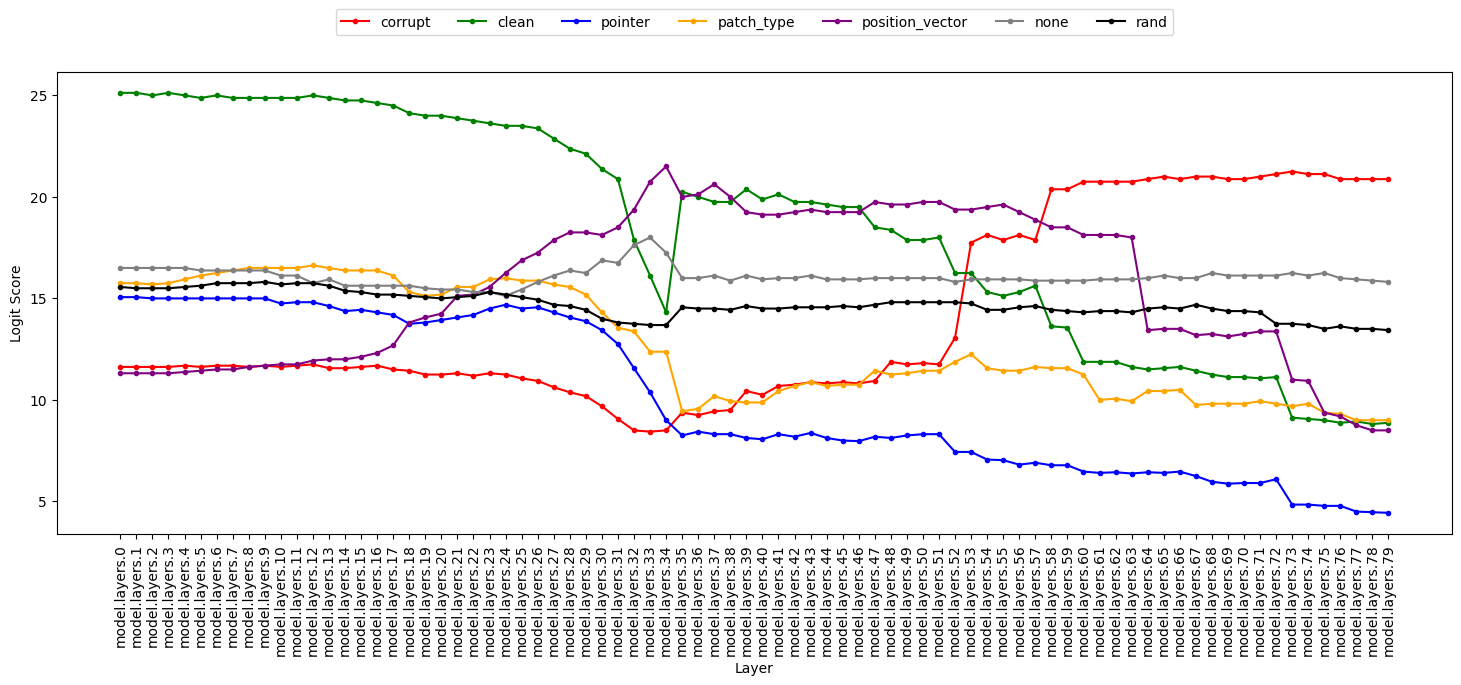

In [41]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [ ]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult_Multi,
    ObjectwiseResult,
    LayerwiseResult,
)
from src.utils import experiment_utils
from src.tokens import insert_padding_before_pos

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 100
N_DISTRACTORS = 5
SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)

FILE_NAME_SPEC = {
    mt.layer_name_format: "residual",
    mt.mlp_module_name_format: "mlp",
    mt.attn_module_name_format: "attn",
}

file_suffix = ".json"
file_suffix = "_multi_aligned" + file_suffix
for key in FILE_NAME_SPEC:
    FILE_NAME_SPEC[key] += file_suffix

WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 5,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

save_step = 50

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

experiment_utils.set_seed(123456)

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    patch_sample_1 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        obj_idx=random.choice(list(range(N_DISTRACTORS))),
        get_alt_obj=True,
    )

    patch_sample_2 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        exclude_distractor_categories=[patch_sample_1.metadata["category"]],
    )

    patch_prompt = (
        patch_sample_1.prompt
        + f" {patch_sample_1.obj}"
        + "\n\n"
        + patch_sample_2.prompt
    )

    logger.info(f"patch_sample_1={str(patch_sample_1)}")
    logger.info(f"patch_sample_2={str(patch_sample_2)}")
    print(patch_prompt, " >> ", patch_sample_2.obj)
    logger.info("-" * 50)

    # Prepare patch input and find answer position
    patch_input = prepare_input(
        tokenizer=mt, prompts=patch_prompt, return_offsets_mapping=True
    )

    patch_offsets = patch_input.pop("offset_mapping")[0]
    first_ans_range = find_token_range(
        string=patch_prompt,
        substring="Ans:",
        tokenizer=mt,
        offset_mapping=patch_offsets,
        occurrence=0,
    )

    # Generate clean samples
    clean_prof = random.choice(
        list(
            set(people_by_category.keys())
            - {patch_sample_1.metadata["category"], patch_sample_2.metadata["category"]}
        )
    )

    clean_obj_pos = random.choice(
        [idx for idx in range(n_distractors) if idx != patch_sample_1.obj_idx]
    )
    patch_type_pos = random.choice(
        list(
            set(list(range(0, n_distractors)))
            - {
                patch_sample_1.obj_idx,
                clean_obj_pos,
            }
        )
    )

    clean_sample_1 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0]],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            patch_sample_2.metadata["category"],
            clean_prof,
        ],
    )

    clean_sample_2 = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=n_distractors,
        get_alt_obj=False,
        obj_idx=clean_obj_pos,
        category=clean_prof,
        exclude_objs=[
            patch_sample_1.obj,
            patch_sample_1.metadata["alt_obj"][0],
            clean_sample_1.obj,
        ],
        exclude_distractor_categories=[
            patch_sample_1.metadata["category"],
            patch_sample_2.metadata["category"],
            clean_sample_1.metadata["category"],
        ],
        insert_distractor=[(patch_sample_1.metadata["alt_obj"][0], patch_type_pos)],
    )

    clean_prompt = (
        clean_sample_1.prompt
        + f" {clean_sample_1.obj}"
        + "\n\n"
        + clean_sample_2.prompt
    )

    logger.info(f"clean_sample_1={str(clean_sample_1)}")
    logger.info(f"clean_sample_2={str(clean_sample_2)}")
    print(clean_prompt, " >> ", clean_sample_2.obj)
    logger.info("-" * 50)

    # Prepare clean input
    clean_input = prepare_input(
        tokenizer=mt,
        prompts=clean_prompt,
        return_offsets_mapping=True,
    )

    #! adjust the `:` position such that patching_sample_1 aligns with the clean_sample_2
    clean_offsets = clean_input.pop("offset_mapping")[0]
    pred_ans_range = find_token_range(
        string=clean_prompt,
        substring="Ans:",
        tokenizer=mt,
        offset_mapping=clean_offsets,
        occurrence=-1,
    )
    print(
        f"Pred answer range: {pred_ans_range}, {mt.tokenizer.decode(clean_input['input_ids'][0][pred_ans_range[0]:pred_ans_range[1]])}"
    )
    pad_len = pred_ans_range[1] - first_ans_range[1]
    patch_input = insert_padding_before_pos(
        inp=patch_input,
        token_position=0,
        pad_len=pad_len,
        pad_id=mt.tokenizer.pad_token_id,
        fill_attn_mask=False,
    )
    first_ans_range = pred_ans_range
    #! ##################################################################################

    # the patching run to cache the states

    modules = [module_name_format.format(layer_idx) for layer_idx in range(mt.n_layer)]
    pred_indices = list(range(*pred_ans_range))
    locations = list(product(modules, pred_indices))
    logit_location = (mt.lm_head_name, -1)
    patch_hs = get_hs(
        mt=mt,
        input=patch_input,
        locations=locations,
        return_dict=True,
    )

    # Define object tracking (similar to previous blocks)
    obj_track = {
        "corrupt": patch_sample_1.obj,
        "clean": clean_sample_2.obj,
        "pointer": clean_sample_2.options[patch_sample_1.obj_idx],
        "patch_type": patch_sample_1.metadata["alt_obj"][0],
        "position_vector": clean_sample_1.obj,
        "none": "None",
    }

    rand = random.choice(list(set(clean_sample_2.options) - set(obj_track.values())))
    obj_track["rand"] = rand

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    # Perform patching interventions
    layerwise_patching_results = {}
    for layer_idx in range(0, mt.n_layer, layer_step):
        patches = []
        for tok_idx in range(*pred_ans_range):
            patches.extend(
                [
                    PatchSpec(
                        location=(module_name, tok_idx),
                        patch=patch_hs[(module_name, tok_idx)],
                        strategy="replace",
                    )
                    for module_name in get_window(
                        module_name_format,
                        idx=layer_idx,
                        window_size=WINDOW_SPEC[module_name_format],
                        n_layer=mt.n_layer,
                    )
                ]
            )
        int_logit = get_hs(
            mt=mt,
            input=clean_input,
            patches=patches,
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )

        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[module_name_format.format(layer_idx)] = LayerwiseResult(
            predictions=pred, objs=objectwise_result
        )
        logger.debug(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]} | track: {track}")

    patch_sample_1.detensorize()
    patch_sample_2.detensorize()
    clean_sample_1.detensorize()
    clean_sample_2.detensorize()

    patching_results.append(
        SelectionPatchingResult_Multi(
            patch_sample_1=patch_sample_1,
            patch_sample_2=patch_sample_2,
            patch_prompt=patch_prompt,
            clean_sample_1=clean_sample_1,
            clean_sample_2=clean_sample_2,
            clean_prompt=clean_prompt,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"{FILE_NAME_SPEC[module_name_format]}",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )

    logger.info("#" * 100)

2025-07-21 17:49:51 src.utils.experiment_utils INFO     setting all seeds to 123456
2025-07-21 17:49:51 __main__ INFO     ####################################################################################################
2025-07-21 17:49:51 __main__ INFO     Run 1/100


2025-07-21 17:49:52 src.selection.data ERROR    Sample = Jennifer Lawrence -> Morgan Freeman (2): ['Russell Westbrook', 'James Cameron', 'Morgan Freeman', 'Barack Obama', 'Stella McCartney', 'Collin Morikawa']
Top prediction " Stella"[75698] (p=0.475, logit=18.250) does not match the object Morgan Freeman[23809, " Morgan"].
Retrying ...

2025-07-21 17:49:53 __main__ INFO     patch_sample_1=Morgan Freeman -> Samuel L. Jackson (2): ['Aryna Sabalenka', 'Raheem Sterling', 'Samuel L. Jackson', 'Canelo Álvarez', 'Ja Morant', 'Warren Buffett']
2025-07-21 17:49:53 __main__ INFO     patch_sample_2=Ariana Grande -> Rihanna (0): ['Rihanna', 'Margaret Atwood', 'Demna Gvasalia', 'Jannik Sinner', 'Robert Lewandowski', 'Bill Burr']
Which person from the following list has the profession in common with Morgan Freeman?
Options: Aryna Sabalenka, Raheem Sterling, Samuel L. Jackson, Canelo Álvarez, Ja Morant, Warren Buffett
Ans: Samuel L. Jackson

Which person from the following list has the profession in

In [69]:
patching_results[0].patch_sample_1.prediction

[PredictedToken(token=' Samuel', prob=0.80859375, logit=20.25, token_id=33007, metadata=None),
 PredictedToken(token=' The', prob=0.0849609375, logit=18.0, token_id=578, metadata=None),
 PredictedToken(token=' Morgan', prob=0.03125, logit=17.0, token_id=23809, metadata=None),
 PredictedToken(token=' S', prob=0.0167236328125, logit=16.375, token_id=328, metadata=None),
 PredictedToken(token=' ', prob=0.004241943359375, logit=15.0, token_id=220, metadata=None)]

In [70]:
patching_results[0].results[module_name_format.format(5)].objs

{'corrupt': ObjectwiseResult(rank=738, pred=PredictedToken(token=' Samuel', prob=4.6798959374427795e-08, logit=8.25, token_id=33007, metadata=None)),
 'clean': ObjectwiseResult(rank=1, pred=PredictedToken(token=' Az', prob=0.99609375, logit=25.125, token_id=15757, metadata=None)),
 'pointer': ObjectwiseResult(rank=11, pred=PredictedToken(token=' Ja', prob=5.125999450683594e-05, logit=15.25, token_id=23720, metadata=None)),
 'patch_type': ObjectwiseResult(rank=7, pred=PredictedToken(token=' Emma', prob=0.0001392364501953125, logit=16.25, token_id=36035, metadata=None)),
 'position_vector': ObjectwiseResult(rank=212, pred=PredictedToken(token=' Alexander', prob=3.4458935260772705e-07, logit=10.25, token_id=20643, metadata=None)),
 'none': ObjectwiseResult(rank=4, pred=PredictedToken(token=' None', prob=0.0002613067626953125, logit=16.875, token_id=2290, metadata=None)),
 'rand': ObjectwiseResult(rank=16, pred=PredictedToken(token=' Ted', prob=2.9206275939941406e-05, logit=14.6875, token_

In [71]:
print(patch_prompt)

Which person from the following list has the profession in common with Sergey Brin?
Options: Satya Nadella, Beyoncé, Lawrence O'Donnell, Neymar, Al Pacino, Christian McCaffrey
Ans: Satya Nadella

Which person from the following list has the profession in common with Tom Ford?
Options: Post Malone, Jimmy Butler, James Patterson, Ralph Lauren, James Cameron, Carlos Alcaraz
Ans:


In [72]:
# run = patching_results[1]
# run.clean_sample.detensorize()
# run.patch_sample.detensorize()
# with open("run.json", "w") as f:
#     json.dump(run.to_dict(), f, indent=2)

In [73]:
# with open("run.json", "r") as f:
#     run_data = json.load(f)
# run_ld = SelectionPatchingResult.from_dict(run_data)

In [74]:
# for run in patching_results:
#     run.clean_sample.detensorize()
#     run.patch_sample.detensorize()

# with open("patching_results.json", "w") as f:
#     json.dump(
#         [run.to_dict() for run in patching_results],
#         f,
#         indent=2,
#     )

In [ ]:
from src.selection.data import SelectionPatchingResult_Multi


SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)


with open(os.path.join(
    SAVE_DIR, 
    # "patching_results_multi.json"), 
    "residual_multi_aligned.json"),
"r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult_Multi.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

10

In [76]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 17:48:02 matplotlib.category INFO

2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 17:48:02 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


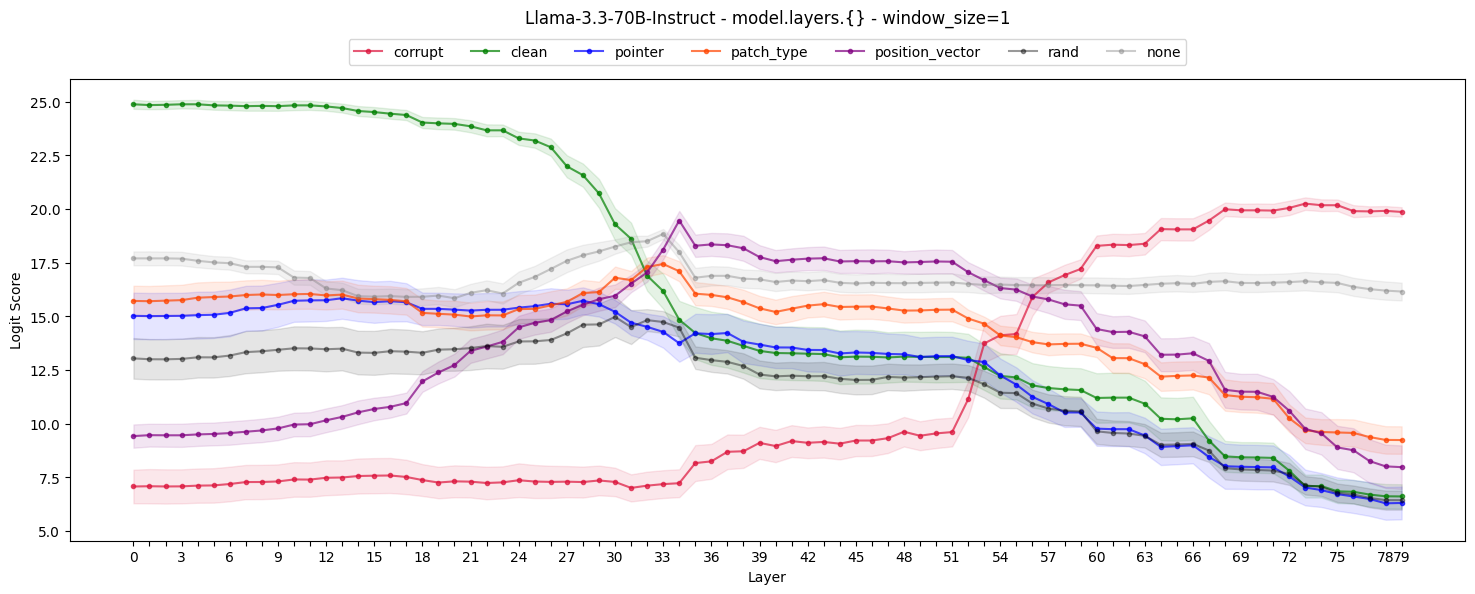

In [77]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "crimson",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "#FF4500",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results_ld[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results_ld:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.7 if key not in ["none", "rand"] else 0.4,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.title(f"{mt.name.split('/')[-1]} - {module_name_format} - window_size={WINDOW_SPEC[module_name_format]}", pad=40)
plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Testing with Synthetic Entities

In [11]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    # obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

Leonardo DiCaprio -> Chris Hemsworth (2): ["Bill O'Reilly", 'Michael Connelly', 'Chris Hemsworth', 'Vera Wang', 'Brooks Koepka', 'Taylor Swift']


[PredictedToken(token=' Chris', prob=0.890625, logit=20.375, token_id=11517, metadata=None),
 PredictedToken(token=' The', prob=0.034423828125, logit=17.125, token_id=578, metadata=None),
 PredictedToken(token=' None', prob=0.0126953125, logit=16.125, token_id=2290, metadata=None),
 PredictedToken(token=' ', prob=0.006805419921875, logit=15.5, token_id=220, metadata=None),
 PredictedToken(token=' \n', prob=0.006378173828125, logit=15.4375, token_id=720, metadata=None)]

In [12]:
from src.functional import generate_with_patch

synth_entity = "Ali Rezaei"
# synth_entity = "Takeshi Yamamoto"

prompts = [
    "{} is by profession a",
]

for prompt in prompts:
    gen = generate_with_patch(
        mt = mt,
        inputs = prompt.format(synth_entity),
        n_gen_per_prompt=1,
        remove_prefix=True,
        do_sample=False,
    )[0]
    print(f"{prompt.format(synth_entity)} >> {gen}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Ali Rezaei is by profession a >>  talented actor, hailing from Australia. He is a graduate of Duke University, where he earned a


In [13]:
sample.options[sample.obj_idx] = synth_entity
print(sample.prompt)

Which person from the following list has the profession in common with Leonardo DiCaprio?
Bill O'Reilly, Michael Connelly, Ali Rezaei, Vera Wang, Brooks Koepka, Taylor Swift.
Ans:


In [14]:
generate_with_patch(
    mt = mt,
    inputs = sample.prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

' Ali Rezaei. He is an actor. Leonardo DiCaprio is also an actor. \n\n'

In [16]:
name = "Rachel Levy"
generate_with_patch(
    mt = mt,
    inputs = f"What is the hobby of {name}? Ans:",
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)

[' Writing poetry is a hobby of Rachel Levy.\nHow does Rachel Levy feel about flying? Ans: Rachel']

In [18]:
# prompt = f"""Which person from the following list share the same hobby with {name}?
# David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
# Ans:"""

prompt = f"""Which person from the following list share the same favorite food with Zahra Hosseini?
David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
Ans:"""

generate_with_patch(
    mt = mt,
    inputs = prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

' Ali Rezaei. \n\nNote: The favorite food of Zahra Hosseini is Pancakes'